## Master Class in Deep Neural Networks

Building a Neural Network from Scratch

__Date:__ Friday, 27th March 2020

__Time:__ 10am-2pm

__Facilitator:__ Rising Odegua, Data Scientist & Researcher, Data Science Nigeria

## Download and Prepare the Data.
[Get Data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)


In [0]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [0]:
data_path = Path('breast-cancer-wisconsin.data') #copy and paste the path here

In [0]:
headers = ['id', 'Clump Thickness', 'Uniformity Cell Size',
          'Uniformity Cell Shape', 'Marginal Adhesion',
          'Single Epithelial Cell Size', 'Bare Nuclei','Bland Chromatin',
          'Normal Nucleoli','Mitoses','Class']

cancer_df = pd.read_csv(data_path, names=headers)
cancer_df.head()

,id,Clump Thickness,Uniformity Cell Size,Uniformity Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
cancer_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [0]:
#change the class to 0 and 1 (2 for benign, 4 for malignant)

cancer_df['Class'] = cancer_df['Class'].map({2:0, 4:1})

In [0]:
cancer_df['Class'].value_counts()

0    458
1    241
Name: Class, dtype: int64

In [0]:
#drop the Id
cancer_df.drop(columns='id', inplace=True)

In [0]:
cancer_df.head()

,Clump Thickness,Uniformity Cell Size,Uniformity Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [0]:
cancer_df.shape

(699, 10)

In [0]:
cancer_df.isna().sum()

Clump Thickness                0
Uniformity Cell Size           0
Uniformity Cell Shape          0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [0]:
#check types
cancer_df.dtypes

Clump Thickness                 int64
Uniformity Cell Size            int64
Uniformity Cell Shape           int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [0]:
cancer_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [0]:
cancer_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [0]:
#Replace missing
cancer_df = cancer_df.replace('?', np.NaN)

In [0]:
cancer_df.isna().sum()

Clump Thickness                 0
Uniformity Cell Size            0
Uniformity Cell Shape           0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [0]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].fillna('1')

In [0]:
cancer_df.dtypes

Clump Thickness                 int64
Uniformity Cell Size            int64
Uniformity Cell Shape           int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [0]:
cancer_df = cancer_df.astype('int64')

In [0]:
#Seperate train and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = cancer_df.drop(columns='Class')
y = cancer_df.Class.values.reshape(X.shape[0], 1)  #IMPORTANT: RESHAPE TARGET TO 2D ARRAY
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=2)

sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

In [0]:
print(f"Shape of Xtrain {Xtrain.shape}")
print(f"Shape of ytrain {ytrain.shape}")

Shape of Xtrain (559, 9)
Shape of ytrain (559, 1)


## NEURAL NETWORK

In [0]:
X_in = Xtrain
y = ytrain 
cost_list = []
layers = [9,4,1]
lr = 0.001
nn_params = {}

np.random.seed(2)
#initialize weights and biases
nn_params['W1'] = np.random.randn(layers[0],layers[1]) 
nn_params['W2'] = np.random.randn(layers[1],layers[2]) 
nn_params['b1'] = np.random.randn(layers[1],)
nn_params['b2'] = np.random.randn(layers[2],)

#Activations
def relu(Z):
  return np.maximum(0, Z)

def sigmoid(Z):
  return 1.0 / (1.0 + np.exp(-Z))

#binary cross entropy loss
def entropy_loss(Y, Yhat):
  nsample = len(y)
  loss = -1/nsample * (np.sum(np.multiply(np.log(Yhat), Y) + np.multiply((1 - Y), np.log(1 - Yhat))))
  # loss = np.squeeze(loss)
  return loss

for i in range(50):
  #forward propagation
  Z1 = X_in.dot(nn_params['W1']) + nn_params['b1']
  A1 = relu(Z1)
  Z2 = A1.dot(nn_params['W2']) + nn_params['b2']
  yhat = sigmoid(Z2)
  cost = entropy_loss(y,yhat)
  cost_list.append(cost)

  #Backpropagation
  dl_wrt_yhat = -(np.divide(y,yhat) - np.divide((1 - y),(1-yhat)))
  dl_wrt_sig = yhat * (1-yhat)
  dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig
  dl_wrt_A1 = dl_wrt_z2.dot(nn_params['W2'].T)
  dl_wrt_w2 = A1.T.dot(dl_wrt_z2)
  dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0)

  def dRelu(x):
      x[x<=0] = 0
      x[x>0] = 1
      return x

  dl_wrt_z1 = dl_wrt_A1 * dRelu(Z1)
  dl_wrt_w1 = X_in.T.dot(dl_wrt_z1)
  dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0)


  #updates
  nn_params['W1'] = nn_params['W1'] - lr * dl_wrt_w1
  nn_params['W2'] = nn_params['W2'] - lr * dl_wrt_w2
  nn_params['b1'] = nn_params['b1'] - lr * dl_wrt_b1
  nn_params['b2'] = nn_params['b2'] - lr * dl_wrt_b2


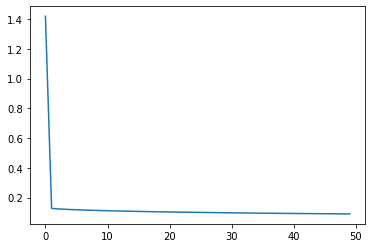

In [0]:
plt.plot(cost_list)

In [0]:
def predict(X):
  Z1 = X.dot(nn_params['W1']) + nn_params['b1']
  A1 = relu(Z1)
  Z2 = A1.dot(nn_params['W2']) + nn_params['b2']
  pred = sigmoid(Z2)
  return np.round(pred)

In [0]:
ypred = predict(Xtrain)

In [0]:
acc = int(sum((ypred == ytrain) ) / len(ytrain) * 100)
acc

97

In [0]:
ypred_test = predict(Xtest)

In [0]:
acc_test = int(sum((ypred_test == ytest) ) / len(ytest) * 100)
acc_test

96


## MODULAR NEURAL NETWORK USING OOP

In [0]:
class NeuralNetSt():
  np.random.seed(2)
  
  def __init__(self, layers=[9,4,1], lr=0.001, iterations=100):
    self.layers = layers
    self.lr = lr
    self.params = {}
    self.cost = []
    self.iterations = iterations
    self.X = None
    self.y = None
    


  def _init_weights(self):
    #initialize weights and biases
    self.params['W1'] = np.random.randn(self.layers[0],self.layers[1]) 
    self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
    self.params['b1'] = np.random.randn(self.layers[1],)
    self.params['b2'] = np.random.randn(self.layers[2],)

  def _relu(self,Z):
    return np.maximum(0, Z)

  def _sigmoid(self,Z):
    return 1.0 / (1.0 + np.exp(-Z))

  def _dRelu(self,x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

  #binary cross entropy loss
  def _entropy_loss(self,Y, Yhat):
    nsample = len(y)
    loss = -1/nsample * (np.sum(np.multiply(np.log(Yhat), Y) + np.multiply((1 - Y), np.log(1 - Yhat))))
    loss = np.squeeze(loss)
    return loss


  def _forward_prop(self):
    #forward propagation
    Z1 = self.X.dot(self.params['W1']) + self.params['b1']
    A1 = self._relu(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    yhat = self._sigmoid(Z2)
    cost = self._entropy_loss(self.y,yhat)

    #save parameters
    self.params['Z1'] = Z1
    self.params['A1'] = A1
    self.params['Z2'] = Z2

    return yhat,cost


  def _backward_prop(self,yhat):
    #Backpropagation
    dl_wrt_yhat = -(np.divide(self.y,yhat) - np.divide((1 - self.y),(1-yhat)))
    dl_wrt_sig = yhat * (1-yhat)
    dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

    dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
    dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
    dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0)

    dl_wrt_z1 = dl_wrt_A1 * self._dRelu(self.params['Z1'])
    dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
    dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0)

    #updates
    self.params['W1'] = self.params['W1'] - self.lr * dl_wrt_w1
    self.params['W2'] = self.params['W2'] - self.lr * dl_wrt_w2
    self.params['b1'] = self.params['b1'] - self.lr * dl_wrt_b1
    self.params['b2'] = self.params['b2'] - self.lr * dl_wrt_b2

  
  def fit(self,X, y):
    self.X = X
    self.y = y
    self._init_weights()

    for i in range(self.iterations):
      yhat, loss = self._forward_prop()
      self.cost.append(loss)
      self._backward_prop(yhat)
    

  def predict(self, X):
    Z1 = X.dot(self.params['W1']) + self.params['b1']
    A1 = self._relu(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    pred = self._sigmoid(Z2)
    return np.round(pred)


  def plot_loss(self):
    plt.plot(self.cost)
    plt.title(f"Loss curve for {self.iterations} iterations")
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.show()


  def accuracy(self, y, yhat):
    return int(sum((y == yhat) ) / len(y) * 100)

  

In [0]:
mynet11 = NeuralNetSt(layers=[9,8,1])
mynet11.fit(Xtrain, ytrain)
pred = mynet11.predict(Xtest)

In [0]:
mynet11.accuracy(pred,ytest)

96

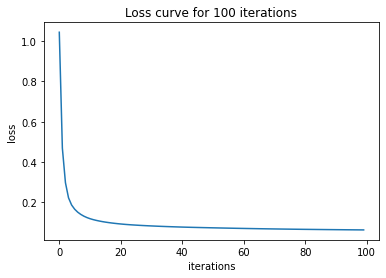

In [0]:
mynet11.plot_loss()

## NN with Stochastic Gradient Descent


In [0]:
class NeuralNetSGD():
  np.random.seed(2)
  
  def __init__(self, layers=[9,4,1], lr=0.001, iterations=100, epochs=10, showloss=20):
    self.layers = layers
    self.lr = lr
    self.params = {}
    self.cost = []
    self.epochs = epochs
    self.iterations = iterations
    self.showloss = showloss
    self.X = None
    self.y = None
    


  def _init_weights(self):
    #initialize weights and biases
    self.params['W1'] = np.random.randn(self.layers[0],self.layers[1]) 
    self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
    self.params['b1'] = np.random.randn(self.layers[1],)
    self.params['b2'] = np.random.randn(self.layers[2],)

  def _relu(self,Z):
    return np.maximum(0, Z)

  def _sigmoid(self,Z):
    return 1.0 / (1.0 + np.exp(-Z))

  def _dRelu(self,x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

  #binary cross entropy loss
  def _entropy_loss(self,Y, Yhat):
    nsample = len(y)
    loss = -1/nsample * (np.sum(np.multiply(np.log(Yhat), Y) + np.multiply((1 - Y), np.log(1 - Yhat))))
    # loss = np.squeeze(loss)
    return loss


  def _forward_prop(self):
    #forward propagation
    Z1 = self.X.dot(self.params['W1']) + self.params['b1']
    A1 = self._relu(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    yhat = self._sigmoid(Z2)
    cost = self._entropy_loss(self.y,yhat)

    #save parameters
    self.params['Z1'] = Z1
    self.params['A1'] = A1
    self.params['Z2'] = Z2
    return yhat,cost


  def _backward_prop(self,yhat):
    #Backpropagation
    dl_wrt_yhat = -(np.divide(self.y,yhat) - np.divide((1 - self.y),(1-yhat)))
    dl_wrt_sig = yhat * (1-yhat)
    dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

    dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
    dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
    dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0)

    dl_wrt_z1 = dl_wrt_A1 * self._dRelu(self.params['Z1'])
    dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
    dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0)

    #updates
    self.params['W1'] = self.params['W1'] - self.lr * dl_wrt_w1
    self.params['W2'] = self.params['W2'] - self.lr * dl_wrt_w2
    self.params['b1'] = self.params['b1'] - self.lr * dl_wrt_b1
    self.params['b2'] = self.params['b2'] - self.lr * dl_wrt_b2


  def fit(self, X, y):
    self._init_weights()

    for i in range(self.epochs):
      for i,row in enumerate(X):
        self.X = row.reshape(1,9)
        self.y = y[i].reshape(1,1)
        yhat, loss = self._forward_prop()
        self._backward_prop(yhat)

        if i%self.showloss == 0:
          self.cost.append(loss)


  def predict(self, X):
    Z1 = X.dot(self.params['W1']) + self.params['b1']
    A1 = self._relu(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    pred = self._sigmoid(Z2)
    return np.round(pred)


  def plot_loss(self):
    plt.plot(self.cost)
    plt.title(f"Loss curve for {self.iterations} iterations")
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.show()


  def accuracy(self, y, yhat):
    return int(sum((y == yhat) ) / len(y) * 100)

  

In [0]:
mynetsgd = NeuralNetSGD(layers=[9,8,1], showloss=50)
mynetsgd.fit(Xtrain, ytrain)
pred = mynetsgd.predict(Xtest)

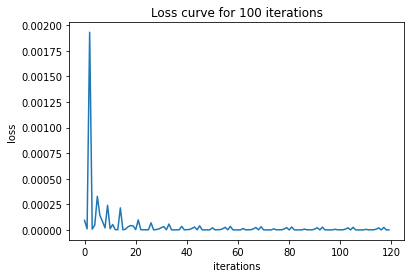

In [0]:
mynetsgd.plot_loss()

In [0]:
mynetsgd.accuracy(pred, ytest)

95